# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

2.464492898579716 0.6265352312785436
2.468493698739748 0.6234120292780957
2.47249449889978 0.620278848707455
2.476495299059812 0.6171357397175025
2.480496099219844 0.6139827526180365
2.484496899379876 0.6108199378769686
2.488497699539908 0.6076473461195153
2.49249849969994 0.6044650281273876
2.496499299859972 0.6012730348379783
2.500500100020004 0.5980714173435469
2.504500900180036 0.5948602268904013
2.508501700340068 0.5916395148780782
2.5125025005001 0.5884093328585195
2.516503300660132 0.5851697325352482
2.520504100820164 0.5819207657625397
2.524504900980196 0.5786624845445928
2.528505701140228 0.5753949410346967
2.53250650130026 0.5721181875343962
2.536507301460292 0.568832276492655
2.540508101620324 0.5655372605050156
2.544508901780356 0.562233192312758
2.548509701940388 0.5589201248020552
2.55251050210042 0.5555981110031264
2.556511302260452 0.5522672040893889
2.560512102420484 0.5489274573766064
2.5645129025805162 0.5455789243220357
2.5685137027405482 0.5422216585235712
2.572514

-0.9464888732737343
5.04500900180036 -0.9451900977679658
5.049009801960392 -0.9438761931897812
5.053010602120424 -0.9425471805700375
5.057011402280456 -0.9412030811814163
5.061012202440488 -0.9398439165380839
5.06501300260052 -0.9384697083953468
5.069013802760552 -0.9370804787493037
5.073014602920584 -0.9356762498364929
5.077015403080616 -0.9342570441335367
5.081016203240648 -0.932822884356782
5.08501700340068 -0.9313737934619356
5.089017803560712 -0.929909794643698
5.093018603720744 -0.9284309113353916
5.097019403880776 -0.9269371672085852
5.101020204040808 -0.925428586172716
5.10502100420084 -0.9239051923747058
5.109021804360872 -0.9223670101985759
5.113022604520904 -0.9208140642650555
5.117023404680936 -0.9192463794311881
5.121024204840968 -0.9176639807899338
5.1250250050010004 -0.9160668936697676
5.1290258051610325 -0.9144551436342735
5.1330266053210645 -0.9128287564817361
5.1370274054810965 -0.9111877582447272
5.1410282056411285 -0.909532175189689
5.1450290058011605 -0.90786203381

0.9371302836098084
7.5015003000600124 0.9385189778957873
7.5055011002200445 0.9398926498898337
7.5095019003800765 0.9412512776044308
7.513502700540108 0.9425948392928664
7.51750350070014 0.9439233134495809
7.521504300860172 0.9452366788105114
7.525505101020204 0.9465349143534321
7.529505901180236 0.9478179992982907
7.533506701340268 0.9490859131075413
7.5375075015003 0.950338635486473
7.541508301660332 0.9515761463835347
7.545509101820364 0.9527984259906559
7.549509901980396 0.954005454743564
7.553510702140428 0.9551972133220976
7.55751150230046 0.9563736826505151
7.561512302460492 0.9575348438978011
7.565513102620524 0.9586806784779663
7.569513902780556 0.9598111680503467
7.573514702940588 0.9609262945198958
7.57751550310062 0.9620260400374749
7.581516303260652 0.963110387000139
7.585517103420684 0.9641793180514175
7.589517903580716 0.9652328160815936
7.593518703740748 0.9662708642279768
7.59751950390078 0.9672934458751732
7.601520304060812 0.968300544655352
7.605521104220844 0.969292

-0.7428211528911981
10.266053210642129 -0.7454936961314595
10.270054010802161 -0.748154306715908
10.274054810962193 -0.750802942057798
10.278055611122225 -0.7534395597620642
10.282056411282257 -0.7560641176260003
10.286057211442289 -0.7586765736399343
10.290058011602321 -0.761276885987901
10.294058811762353 -0.7638650130483113
10.298059611922385 -0.7664409133946186
10.302060412082417 -0.7690045457959817
10.306061212242449 -0.7715558692179244
10.310062012402481 -0.7740948428229935
10.314062812562513 -0.7766214259714108
10.318063612722545 -0.7791355782217253
10.322064412882577 -0.781637259331459
10.32606521304261 -0.784126429257752
10.330066013202641 -0.7866030481580033
10.334066813362673 -0.7890670763905081
10.338067613522705 -0.7915184745150929
10.342068413682737 -0.7939572032937463
10.34606921384277 -0.7963832236912474
10.350070014002801 -0.7987964968757905
10.354070814162833 -0.8011969842196064
10.358071614322865 -0.8035846472995813
10.362072414482897 -0.8059594478978713
10.366073214

 0.2803891518186336
12.854570914182837 0.28422721127588074
12.858571714342869 0.28806072128421584
12.8625725145029 0.2918896204830188
12.866573314662933 0.2957138475854718
12.870574114822965 0.29953334137954046
12.874574914982997 0.3033480407289536
12.878575715143029 0.3071578845741817
12.882576515303061 0.3109628119334141
12.886577315463093 0.3147627619035356
12.890578115623125 0.3185576736611007
12.894578915783157 0.3223474864633077
12.898579715943189 0.32613213964897053
12.902580516103221 0.32991157263949
12.906581316263253 0.33368572493982335
12.910582116423285 0.3374545361394525
12.914582916583317 0.34121794591335103
12.918583716743349 0.3449758940229499
12.922584516903381 0.3487283203171016
12.926585317063413 0.3524751647330427
12.930586117223445 0.35621636729735556
12.934586917383477 0.35995186812692814
12.93858771754351 0.36368160742991257
12.942588517703541 0.36740552550668215
12.946589317863573 0.3711235627507869
12.950590118023605 0.3748356596499077
12.954590918183637 0.3785

0.12055192605328197
15.59111822364473 0.11657934943280075
15.595119023804761 0.1126049067988859
15.599119823964793 0.10862866176797877
15.603120624124825 0.10465067798537053
15.607121424284857 0.10067101912418357
15.61112222444489 0.09668974888435211
15.615123024604921 0.09270693099160278
15.619123824764953 0.0887226291964345
15.623124624924985 0.08473690727309814
15.627125425085017 0.08074982901857562
15.63112622524505 0.07676145825155886
15.635127025405081 0.07277185881142821
15.639127825565113 0.06878109455723064
15.643128625725145 0.06478922936665754
15.647129425885177 0.06079632713502236
15.65113022604521 0.05680245177423779
15.655131026205241 0.05280766721179281
15.659131826365273 0.04881203738972941
15.663132626525305 0.04481562626361916
15.667133426685337 0.040818497801539434
15.67113422684537 0.036820715983049604
15.675135027005402 0.03282234479816688
15.679135827165434 0.02882344824634212
15.683136627325466 0.024824090335435377
15.687137427485498 0.020824335080691425
15.69113

18.275655131026205 -0.5429120141815038
18.279655931186237 -0.5395478478156913
18.28365673134627 -0.536175045241691
18.2876575315063 -0.5327936604458644
18.291658331666333 -0.5294037475519433
18.295659131826365 -0.5260053608201636
18.299659931986398 -0.5225985546463967
18.30366073214643 -0.5191833835612788
18.30766153230646 -0.5157599022293379
18.311662332466494 -0.5123281654481191
18.315663132626526 -0.5088882281473074
18.319663932786558 -0.5054401453878482
18.32366473294659 -0.5019839723610666
18.32766553310662 -0.4985197643877833
18.331666333266654 -0.49504757691742945
18.335667133426686 -0.4915674655271592
18.339667933586718 -0.4880794859209598
18.34366873374675 -0.4845836939287603
18.34766953390678 -0.4810801455055376
18.351670334066814 -0.47756889673042136
18.355671134226846 -0.47405000380579554
18.359671934386878 -0.4705235230563995
18.36367273454691 -0.4669895109284263
18.36767353470694 -0.4634480239886189
18.371674334866974 -0.45989911892336505
18.375675135027006 -0.45634285253

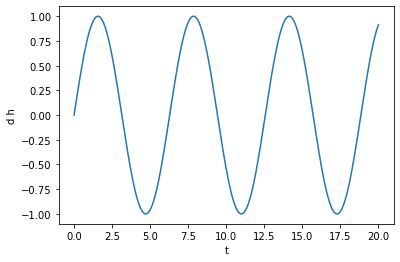

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

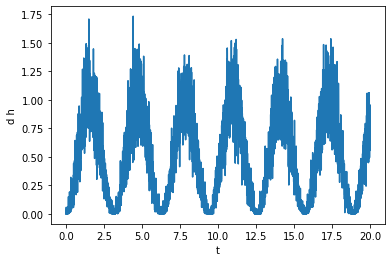

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

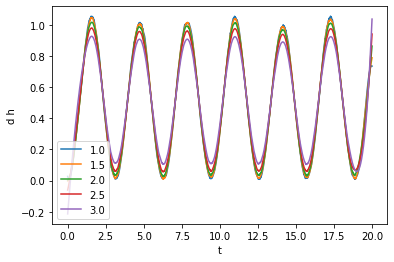

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

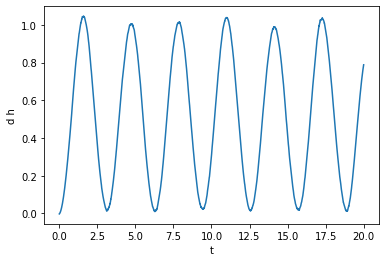

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1878


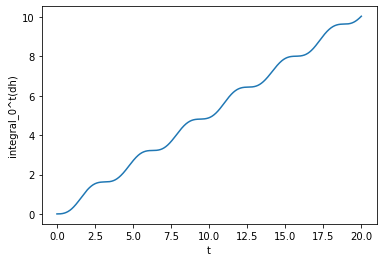

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

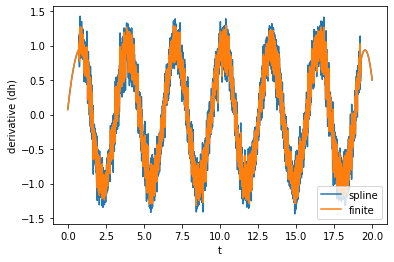

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

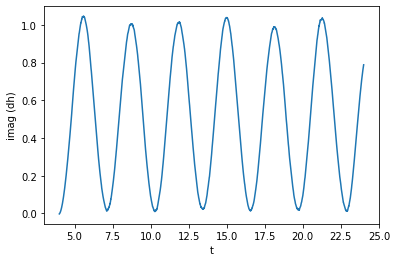

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

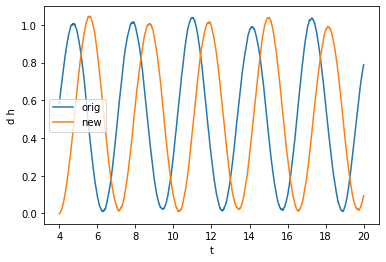

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

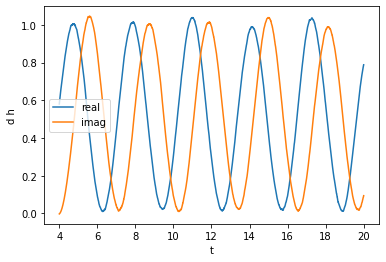

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

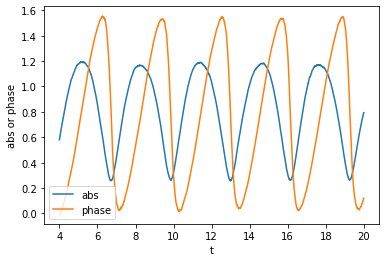

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

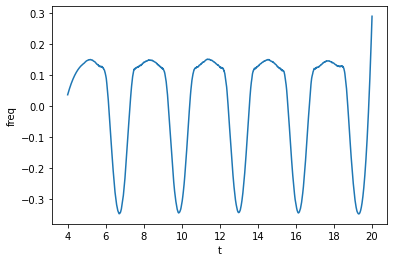

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

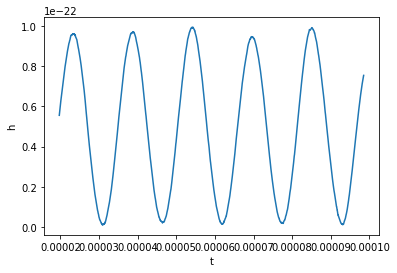

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

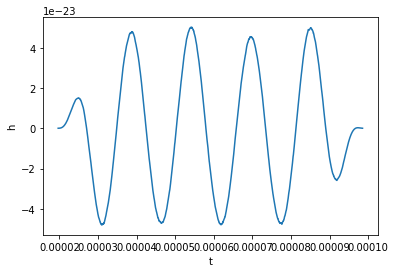

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

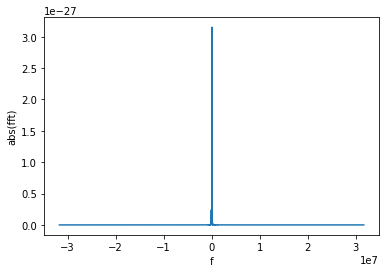

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

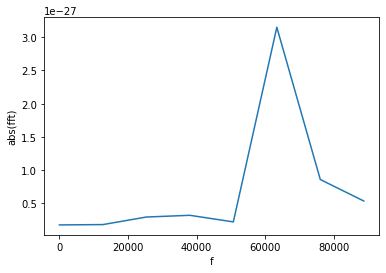

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64206.80


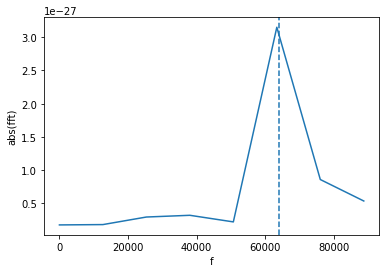

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.150e-27
Maximum with mask 8.599e-28
Length with mask 8
Length after having removed the masked points 7
